In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

data = pd.read_csv("../../storage/train_data/train250318-01_topic_merged_컬럼삭제안됨.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17250 entries, 0 to 17249
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   공고번호               17250 non-null  int64  
 1   주택명                17250 non-null  object 
 2   공급지역코드             17250 non-null  int64  
 3   공급지역명              17250 non-null  object 
 4   공급위치우편번호           17250 non-null  int64  
 5   공급위치               17250 non-null  object 
 6   공급규모               17250 non-null  int64  
 7   모집공고일              17250 non-null  object 
 8   청약접수시작일            17250 non-null  object 
 9   청약접수종료일            17250 non-null  object 
 10  당첨자발표일             17250 non-null  object 
 11  투기과열지구             17250 non-null  object 
 12  조정대상지역             17250 non-null  object 
 13  분양가상한제             17250 non-null  object 
 14  정비사업               17250 non-null  object 
 15  공공주택지구             17250 non-null  object 
 16  대규모택지개발지구          172

In [3]:
data.columns

Index(['공고번호', '주택명', '공급지역코드', '공급지역명', '공급위치우편번호', '공급위치', '공급규모', '모집공고일',
       '청약접수시작일', '청약접수종료일', '당첨자발표일', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업',
       '공공주택지구', '대규모택지개발지구', '수도권내민영공공주택지구', '주택형', '공급세대수', '순위', '거주지역',
       '접수건수', '경쟁률', '최저당첨가점', '최고당첨가점', '평균당첨가점', '전용면적', '미달여부',
       '공급금액(최고가 기준)', '위도', '경도', '행정동코드', '법정동코드', '시도', '시군구', '읍면동1',
       '읍면동2', '전용면적당 공급금액(최고가기준)', '전용면적당 시세차익', '기사 번호', '토픽 1', '토픽 2',
       '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '주요 토픽'],
      dtype='object')

In [4]:
# '최고당첨가점' 컬럼에 NaN 값과 '-'를 0으로 변경
data['최고당첨가점'] = data['최고당첨가점'].replace({np.nan: 0, '-': 0})

# '최고당첨가점' 컬럼을 수치형으로 변경
data['최고당첨가점'] = pd.to_numeric(data['최고당첨가점'])

data['최고당첨가점']

0         0
1         0
2         0
3         0
4         0
         ..
17245     0
17246    74
17247     0
17248    73
17249     0
Name: 최고당첨가점, Length: 17250, dtype: int64

In [5]:
data_1 = data.copy()

In [6]:
from sklearn.preprocessing import MinMaxScaler

# 0이 아닌 최저당첨가점 선택
low_filtered_data = data_1[data_1['최저당첨가점'] != 0]['최저당첨가점'].values.reshape(-1, 1)
high_filtered_data = data_1[data_1['최고당첨가점'] != 0]['최고당첨가점'].values.reshape(-1, 1)


# 정규화된 값을 원본 DataFrame에 적용
data_1.loc[data_1['최저당첨가점'] != 0, '최저당첨가점'] = low_filtered_data
data_1.loc[data_1['최고당첨가점'] != 0, '최고당첨가점'] = high_filtered_data

# 확인
data_1 = data_1[data_1['최저당첨가점'] != 0]
data_1 = data_1[data_1['최고당첨가점'] != 0]

# 규제지역_2와 최저/최고당첨가점 간 상관관계 (드롭해요!)
- 규제지역_2 : 정비사업/공공주택지구/대규모택지개발지구/수도권내민영공공주택지구
- 히트맵 그려서 봤을 때 당첨가점과 상관관계 없음

In [7]:
data_1 = data_1[['공고번호', '주택명','경쟁률', '정비사업', '공공주택지구', '대규모택지개발지구', '수도권내민영공공주택지구', '최저당첨가점', '최고당첨가점']]
data_1

,공고번호,주택명,경쟁률,정비사업,공공주택지구,대규모택지개발지구,수도권내민영공공주택지구,최저당첨가점,최고당첨가점
44,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),2.60,Y,N,N,N,34.0,49
48,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),2.00,Y,N,N,N,24.0,25
54,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),0.00,Y,N,N,N,33.0,33
60,2025000001,래미안 원페를라,305.14,Y,N,N,N,69.0,74
64,2025000001,래미안 원페를라,307.43,Y,N,N,N,69.0,77
...,...,...,...,...,...,...,...,...,...
17240,2020000298,시흥장현 영무예다음,126.76,N,Y,Y,Y,61.0,70
17242,2020000298,시흥장현 영무예다음,0.00,N,Y,Y,Y,59.0,79
17244,2020000298,시흥장현 영무예다음,45.00,N,Y,Y,Y,63.0,74
17246,2020000298,시흥장현 영무예다음,106.42,N,Y,Y,Y,66.0,74


c:\Users\user\anaconda3\envs\env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51137 (\N{HANGUL SYLL

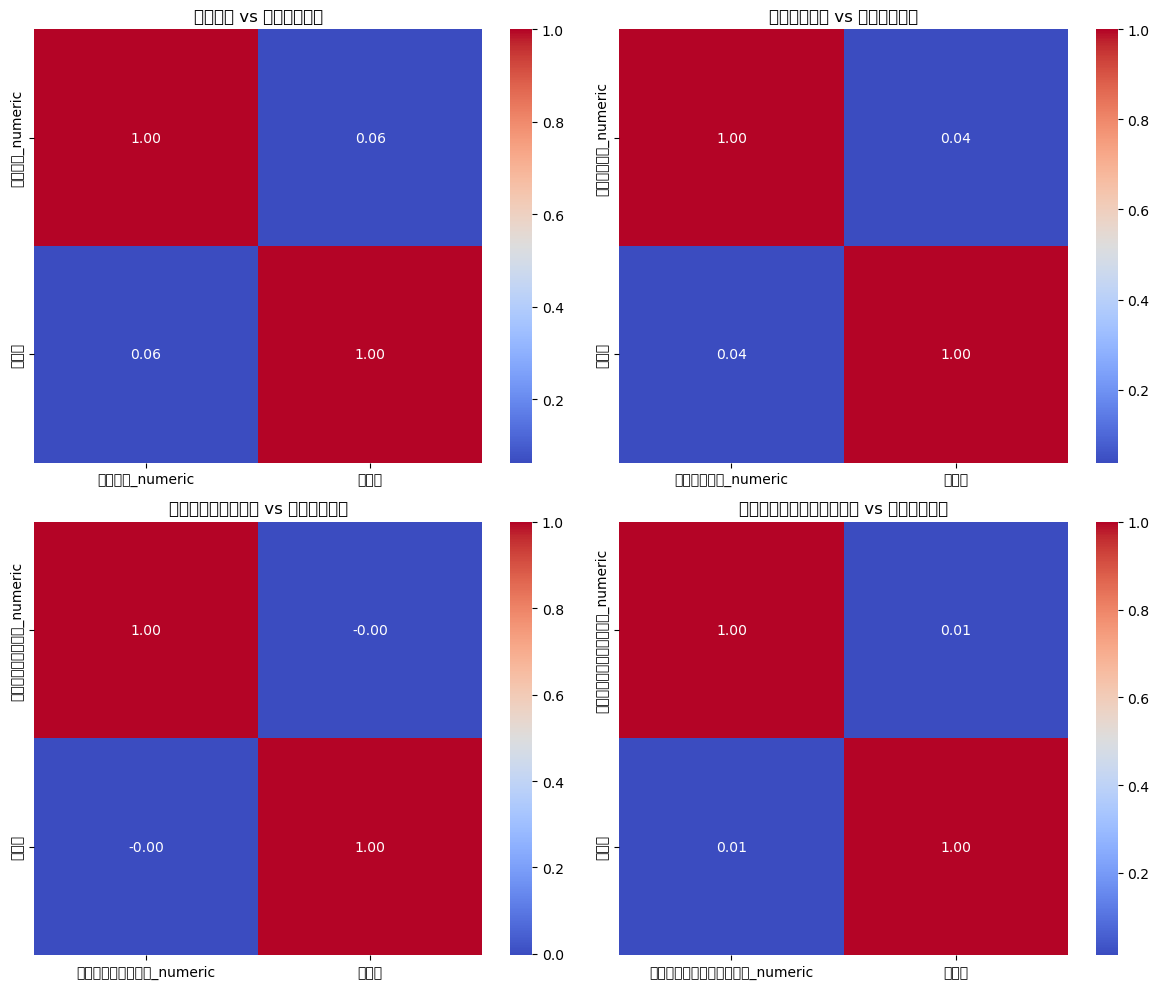

In [8]:
data_1['정비사업_numeric'] = data_1['정비사업'].map({'N': 0, 'Y': 1})
data_1['공공주택지구_numeric'] = data_1['공공주택지구'].map({'N': 0, 'Y': 1})
data_1['대규모택지개발지구_numeric'] = data_1['대규모택지개발지구'].map({'N': 0, 'Y': 1})
data_1['수도권내민영공공주택지구_numeric'] = data_1['수도권내민영공공주택지구'].map({'N': 0, 'Y': 1})

# 상관계수 행렬 생성
cols = ['정비사업_numeric', '공공주택지구_numeric', '대규모택지개발지구_numeric', '수도권내민영공공주택지구_numeric', '경쟁률']
correlation_matrix = data_1[cols].corr()

# 히트맵 시각화 (4개 subplot으로 구성)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

titles = ['정비사업 vs 최저당첨가점', '공공주택지구 vs 최저당첨가점', 
          '대규모택지개발지구 vs 최저당첨가점', '수도권내민영공공주택지구 vs 최저당첨가점']

for ax, col, title in zip(axes.flat, cols[:-1], titles):  
    sns.heatmap(data_1[[col, '경쟁률']].corr(), annot=True, cmap='coolwarm', cbar=True, fmt='.2f', ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

### 최저당첨가점

c:\Users\user\anaconda3\envs\env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51200 (\N{HANGUL SYLLABL

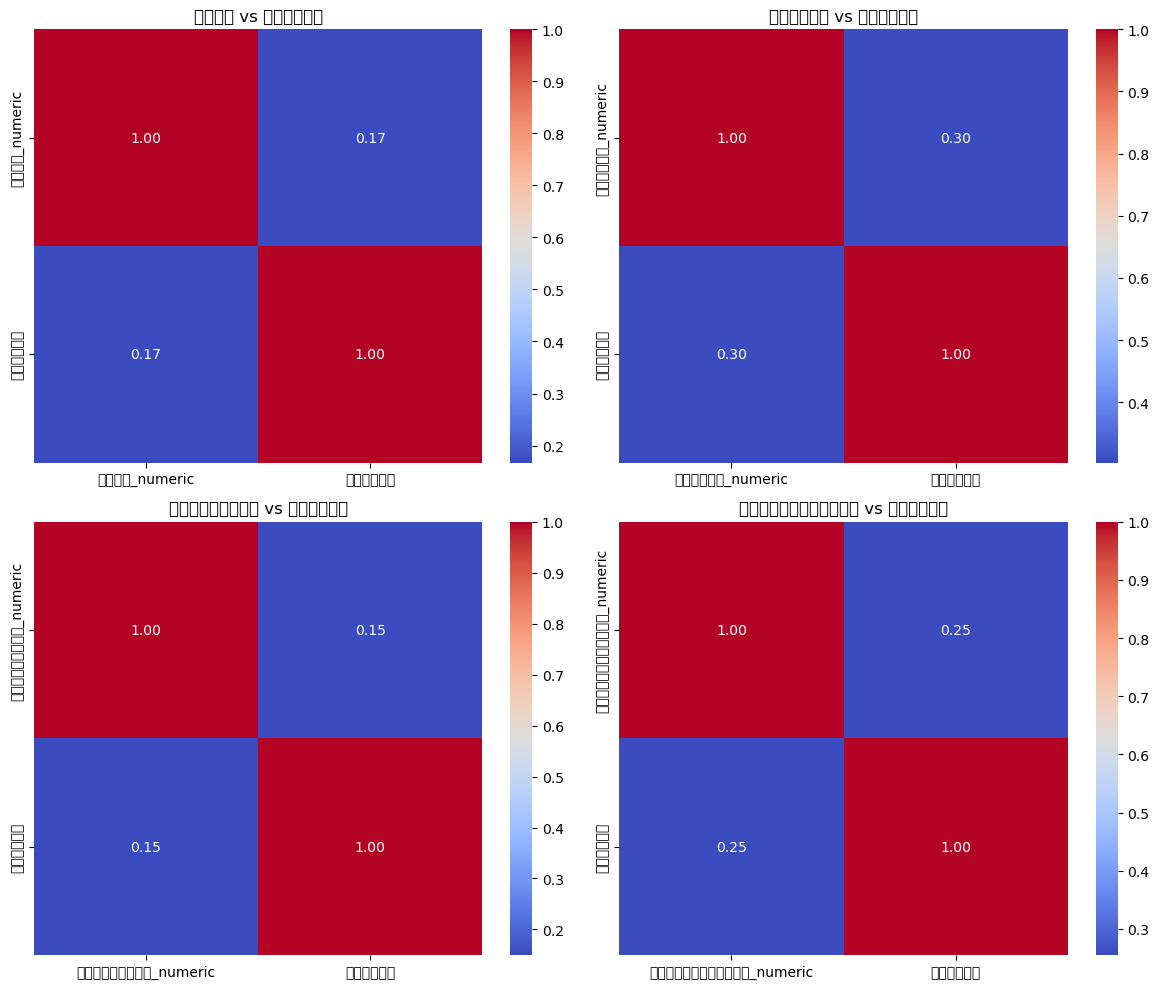

In [9]:
data_1['정비사업_numeric'] = data_1['정비사업'].map({'N': 0, 'Y': 1})
data_1['공공주택지구_numeric'] = data_1['공공주택지구'].map({'N': 0, 'Y': 1})
data_1['대규모택지개발지구_numeric'] = data_1['대규모택지개발지구'].map({'N': 0, 'Y': 1})
data_1['수도권내민영공공주택지구_numeric'] = data_1['수도권내민영공공주택지구'].map({'N': 0, 'Y': 1})

# 상관계수 행렬 생성
cols = ['정비사업_numeric', '공공주택지구_numeric', '대규모택지개발지구_numeric', '수도권내민영공공주택지구_numeric', '최저당첨가점']
correlation_matrix = data_1[cols].corr()

# 히트맵 시각화 (4개 subplot으로 구성)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

titles = ['정비사업 vs 최저당첨가점', '공공주택지구 vs 최저당첨가점', 
          '대규모택지개발지구 vs 최저당첨가점', '수도권내민영공공주택지구 vs 최저당첨가점']

for ax, col, title in zip(axes.flat, cols[:-1], titles):  
    sns.heatmap(data_1[[col, '최저당첨가점']].corr(), annot=True, cmap='coolwarm', cbar=True, fmt='.2f', ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

### 최고당첨가점

c:\Users\user\anaconda3\envs\env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44256 (\N{HANGUL SYLLABL

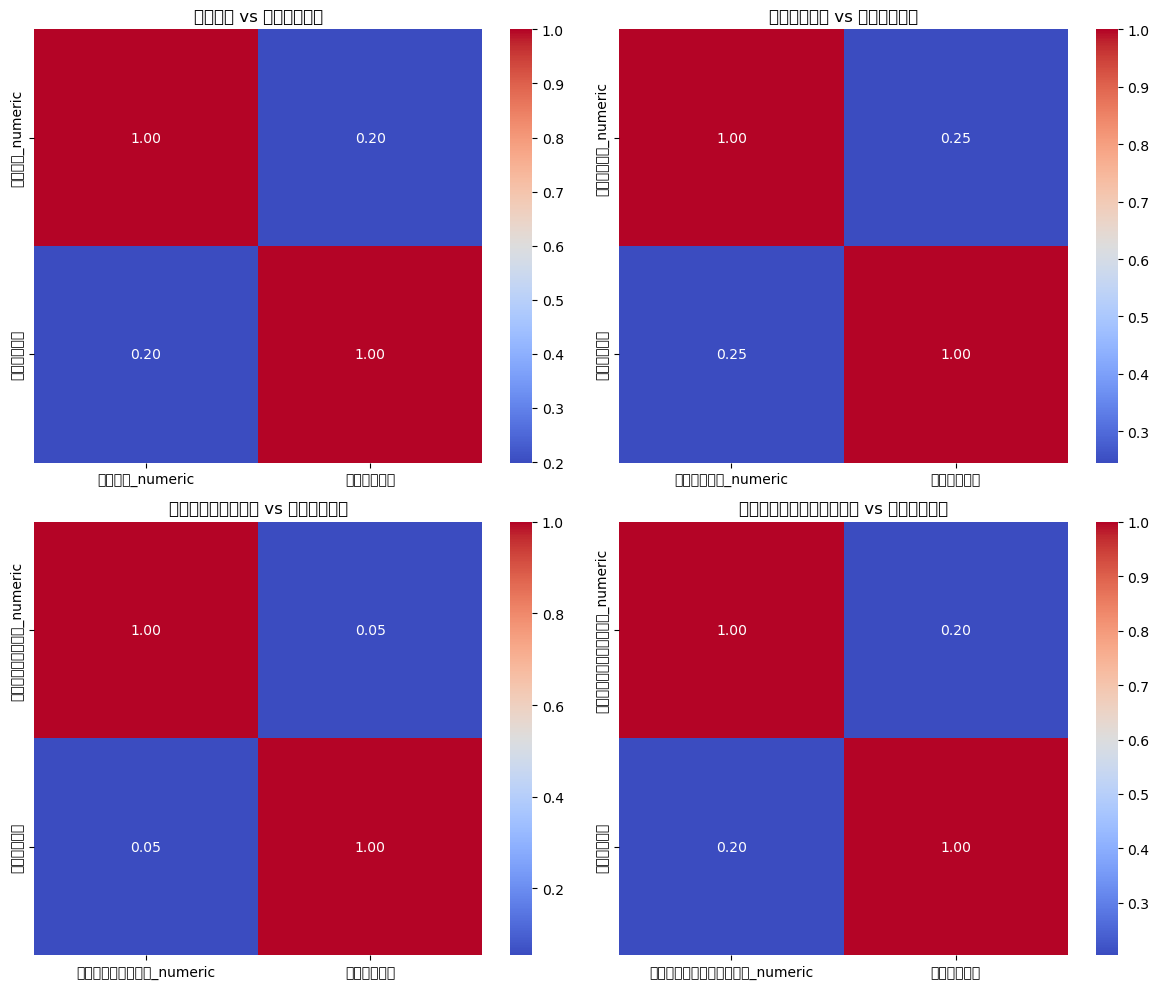

In [10]:
data_1['정비사업_numeric'] = data_1['정비사업'].map({'N': 0, 'Y': 1})
data_1['공공주택지구_numeric'] = data_1['공공주택지구'].map({'N': 0, 'Y': 1})
data_1['대규모택지개발지구_numeric'] = data_1['대규모택지개발지구'].map({'N': 0, 'Y': 1})
data_1['수도권내민영공공주택지구_numeric'] = data_1['수도권내민영공공주택지구'].map({'N': 0, 'Y': 1})

# 상관계수 행렬 생성
cols = ['정비사업_numeric', '공공주택지구_numeric', '대규모택지개발지구_numeric', '수도권내민영공공주택지구_numeric', '최고당첨가점']
correlation_matrix = data_1[cols].corr()

# 히트맵 시각화 (4개 subplot으로 구성)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

titles = ['정비사업 vs 최고당첨가점', '공공주택지구 vs 최고당첨가점', 
          '대규모택지개발지구 vs 최고당첨가점', '수도권내민영공공주택지구 vs 최고당첨가점']

for ax, col, title in zip(axes.flat, cols[:-1], titles):  
    sns.heatmap(data_1[[col, '최고당첨가점']].corr(), annot=True, cmap='coolwarm', cbar=True, fmt='.2f', ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [11]:
data.columns

Index(['공고번호', '주택명', '공급지역코드', '공급지역명', '공급위치우편번호', '공급위치', '공급규모', '모집공고일',
       '청약접수시작일', '청약접수종료일', '당첨자발표일', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업',
       '공공주택지구', '대규모택지개발지구', '수도권내민영공공주택지구', '주택형', '공급세대수', '순위', '거주지역',
       '접수건수', '경쟁률', '최저당첨가점', '최고당첨가점', '평균당첨가점', '전용면적', '미달여부',
       '공급금액(최고가 기준)', '위도', '경도', '행정동코드', '법정동코드', '시도', '시군구', '읍면동1',
       '읍면동2', '전용면적당 공급금액(최고가기준)', '전용면적당 시세차익', '기사 번호', '토픽 1', '토픽 2',
       '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '주요 토픽'],
      dtype='object')

In [12]:
data.drop(['정비사업', '공공주택지구', '대규모택지개발지구', '수도권내민영공공주택지구'], axis=1, inplace=True)
data.columns

Index(['공고번호', '주택명', '공급지역코드', '공급지역명', '공급위치우편번호', '공급위치', '공급규모', '모집공고일',
       '청약접수시작일', '청약접수종료일', '당첨자발표일', '투기과열지구', '조정대상지역', '분양가상한제', '주택형',
       '공급세대수', '순위', '거주지역', '접수건수', '경쟁률', '최저당첨가점', '최고당첨가점', '평균당첨가점',
       '전용면적', '미달여부', '공급금액(최고가 기준)', '위도', '경도', '행정동코드', '법정동코드', '시도',
       '시군구', '읍면동1', '읍면동2', '전용면적당 공급금액(최고가기준)', '전용면적당 시세차익', '기사 번호',
       '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '주요 토픽'],
      dtype='object')

# 공급세대수/규모/접수건수/경쟁률 칼럼 분석

In [13]:
data_2 = f_data.copy()

NameError: name 'f_data' is not defined

In [ ]:
data_2 = data_2[['공고번호', '주택명', '공급규모', '공급세대수', '접수건수', '경쟁률', '최저당첨가점', '최고당첨가점']]
data_2

,공고번호,주택명,공급규모,공급세대수,접수건수,경쟁률,최저당첨가점,최고당첨가점
0,2025000043,부천 JY 포에시아,55,5,0,(△5),NaN,NaN
1,2025000043,부천 JY 포에시아,55,5,15,3.00,NaN,NaN
2,2025000043,부천 JY 포에시아,55,5,3,-,NaN,NaN
3,2025000043,부천 JY 포에시아,55,5,10,-,NaN,NaN
4,2025000043,부천 JY 포에시아,55,5,1,(△4),NaN,NaN
...,...,...,...,...,...,...,...,...
17245,2020000298,시흥장현 영무예다음,747,216.0,"5,234",188.23,-,-
17246,2020000298,시흥장현 영무예다음,747,216.0,"3,442",106.42,66,74
17247,2020000298,시흥장현 영무예다음,747,216.0,0,-,-,-
17248,2020000298,시흥장현 영무예다음,747,216.0,0,-,63,73


In [ ]:
# '최고당첨가점' 컬럼에 NaN 값과 '-'를 0으로 변경
data_2['최고당첨가점'] = data_2['최고당첨가점'].replace({np.nan: 0, '-': 0})

# '최고당첨가점' 컬럼을 수치형으로 변경
data_2['최고당첨가점'] = pd.to_numeric(data['최고당첨가점'])

data_2['최고당첨가점']

C:\Users\user\AppData\Local\Temp\ipykernel_4220\524676811.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_4220\524676811.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0         0
1         0
2         0
3         0
4         0
         ..
17245     0
17246    74
17247     0
17248    73
17249     0
Name: 최고당첨가점, Length: 17250, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 0이 아닌 최저당첨가점 선택
low_filtered_data = data_2[data_2['최저당첨가점'] != 0]['최저당첨가점'].values.reshape(-1, 1)
high_filtered_data = data_2[data_2['최고당첨가점'] != 0]['최고당첨가점'].values.reshape(-1, 1)


# 정규화된 값을 원본 DataFrame에 적용
data_2.loc[data_2['최저당첨가점'] != 0, '최저당첨가점'] = low_filtered_data
data_2.loc[data_2['최고당첨가점'] != 0, '최고당첨가점'] = high_filtered_data

# 확인
data_2 = data_2[data_2['최저당첨가점'] != 0]
data_2 = data_2[data_2['최고당첨가점'] != 0]

In [ ]:
data_2

,공고번호,주택명,공급규모,공급세대수,접수건수,경쟁률,최저당첨가점,최고당첨가점
44,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),29,5,13,2.60,34,49
48,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),29,4,8,2.00,24,25
54,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),29,3,1,-,33,33
60,2025000001,래미안 원페를라,482,35,"10,680",305.14,69,74
64,2025000001,래미안 원페를라,482,30,"9,223",307.43,69,77
...,...,...,...,...,...,...,...,...
17240,2020000298,시흥장현 영무예다음,747,57.0,"1,039",126.76,61,70
17242,2020000298,시흥장현 영무예다음,747,57.0,0,-,59,79
17244,2020000298,시흥장현 영무예다음,747,216.0,"2,925",45.00,63,74
17246,2020000298,시흥장현 영무예다음,747,216.0,"3,442",106.42,66,74


In [ ]:
import folium
import numpy as np
import branca

# 지도 중심 위치 설정 (서울 중심 좌표)
map_center = [37.541, 126.986]
m = folium.Map(location=map_center, zoom_start=12, width="100%", height="100%")

# 색상 범례 설정 (공급세대수에 따른 색상 변화, 파스텔톤 팔레트)
color_scale = branca.colormap.LinearColormap(
    ["#f0e5cf", "#f6c8b6", "#f5a0b7", "#ee5c83", "#e31c68"], 
    vmin=data_2["공급세대수"].min(), 
    vmax=data_2["공급세대수"].max()
)
color_scale.caption = "공급세대수에 따른 색상 변화"

# 마커 추가
for idx, row in data_2.dropna().iterrows():
    # 공급세대수가 350건 이상인 경우만 표시
    if row["공급세대수"] >= 350:
        # 반지름 크기 조정 (로그 스케일 적용)
        radius = np.log1p(row["공급규모"]) * 5  # log(공급규모) * 5 → 크기 범위 조절
        
        # 색상 설정 (공급세대수가 클수록 짙은 색)
        color = color_scale(row["공급세대수"])
        
        # 투명도 조정 (공급세대수가 클수록 불투명)
        fill_opacity = min(0.2 + row["공급세대수"] / 1000, 0.9)  # 최대 0.9까지 증가

        # 지도에 CircleMarker 추가
        folium.CircleMarker(
            location=[row["위도"], row["경도"]],
            radius=radius,  # 크기 조정
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=fill_opacity,
            popup=f"공급세대수: {row['공급세대수']}<br>접수건수: {row['접수건수']}<br>경쟁률: {row['경쟁률']}"
        ).add_to(m)

         # 공급세대수를 원 위에 표시 (텍스트 레이블)
        folium.Marker(
            location=[row["위도"], row["경도"]],
            icon=folium.DivIcon(
                icon_size=(10, 10),  # Smaller icon size
                icon_anchor=(0, 0),  # Position the icon relative to the marker's position
                html=f'<div style="font-size: 8pt; color: black; font-weight: medium; text-align: center;">{row["공급세대수"]}</div>'
            )
        ).add_to(m)

# 색상 범례 지도에 추가
m.add_child(color_scale)

m


TypeError: '<=' not supported between instances of 'str' and 'float'

In [ ]:


fig = px.scatter(
    data_frame = data_2,
    x='공급세대수',
    y='최저당첨가점',
    color='공급규모',  # 여기서 color로 범례 설정
    color_discrete_sequence=px.colors.qualitative.Set2_r,
    template='plotly_white'
)
fig.show()

In [ ]:
data_2[data_2['공급규모'] == 4786]

,공고번호,주택명,공급규모,공급세대수,접수건수,경쟁률,최저당첨가점,최고당첨가점
6914,2022000846,올림픽파크 포레온,4786,5,64,12.80,54,67
6920,2022000846,올림픽파크 포레온,4786,541,154,-,26,64
6922,2022000846,올림픽파크 포레온,4786,424,656,1.55,20,69
6926,2022000846,올림픽파크 포레온,4786,936,"4,879",5.21,51,77
6930,2022000846,올림픽파크 포레온,4786,302,"1,119",3.71,49,72
6934,2022000846,올림픽파크 포레온,4786,149,597,4.01,46,69
6938,2022000846,올림픽파크 포레온,4786,54,476,8.81,62,74
6942,2022000846,올림픽파크 포레온,4786,47,290,6.17,53,71
6946,2022000846,올림픽파크 포레온,4786,209,"1,968",9.42,64,74
6950,2022000846,올림픽파크 포레온,4786,21,138,6.57,54,74


In [ ]:

# Make sure all columns are numeric
data_2_clean = data_2[['공급세대수', '접수건수', '공급규모', '최저당첨가점', '최고당첨가점', '경쟁률']]

# Convert columns to numeric values (if not already numeric)
data_2_clean = data_2_clean.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
data_2_clean = data_2_clean.dropna()

# Now compute the correlation matrix
correlation_matrix = data_2_clean.corr(method='pearson')

# Print the correlation matrix
print(correlation_matrix)

           공급세대수      접수건수      공급규모    최저당첨가점    최고당첨가점       경쟁률
공급세대수   1.000000  0.287673  0.391177 -0.301483  0.177281 -0.188608
접수건수    0.287673  1.000000  0.180277  0.367281  0.498944  0.327629
공급규모    0.391177  0.180277  1.000000 -0.106207  0.204865 -0.122562
최저당첨가점 -0.301483  0.367281 -0.106207  1.000000  0.519602  0.464865
최고당첨가점  0.177281  0.498944  0.204865  0.519602  1.000000  0.227885
경쟁률    -0.188608  0.327629 -0.122562  0.464865  0.227885  1.000000


In [14]:
f_data = pd.read_csv("../../storage/raw_data/병합_청약매물_목록_정보_픽스2.csv")
f_data.columns

C:\Users\user\AppData\Local\Temp\ipykernel_20872\3233360196.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  f_data = pd.read_csv("../../storage/raw_data/병합_청약매물_목록_정보_픽스2.csv")


Index(['주택관리번호', '공고번호', '주택명', '주택구분코드', '주택구분코드명', '주택상세구분코드', '주택상세구분코드명',
       '분양구분코드', '분양구분코드명', '공급지역코드', '공급지역명', '공급위치우편번호', '공급위치', '공급규모',
       '모집공고일', '청약접수시작일', '청약접수종료일', '특별공급접수시작일', '특별공급접수종료일', '해당지역1순위접수시작일',
       '해당지역1순위접수종료일', '경기지역1순위접수시작일', '경기지역1순위접수종료일', '기타지역1순위접수시작일',
       '기타지역1순위접수종료일', '해당지역2순위접수시작일', '해당지역2순위접수종료일', '경기지역2순위접수시작일',
       '경기지역2순위접수종료일', '기타지역2순위접수시작일', '기타지역2순위접수종료일', '당첨자발표일', '계약시작일',
       '계약종료일', '홈페이지주소', '건설업체명_시공사', '문의처', '사업주체명_시행사', '입주예정월', '투기과열지구',
       '조정대상지역', '분양가상한제', '정비사업', '공공주택지구', '대규모택지개발지구', '수도권내민영공공주택지구',
       '모집공고홈페이지주소', '주택형', '공급세대수', '순위', '거주지역', '접수건수', '경쟁률', '최저당첨가점',
       '최고당첨가점', '평균당첨가점', '기사 번호', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5',
       '토픽 6', '토픽 7', '주요 토픽'],
      dtype='object')

In [ ]:
f_data['거주지역'].unique()

array(['해당지역', '기타지역', '기타경기'], dtype=object)

In [ ]:
f_data['순위'].unique()

array(['1순위', '2순위'], dtype=object)

In [ ]:
# 순위 컬럼 수치형 변환
def 순위_변환(순위):
    if 순위 == '1순위':
        return 1
    elif 순위 == '2순위':
        return 2
    else:
        return 0  # 예외 처리
f_data['순위_numeric'] = f_data['순위'].apply(순위_변환)

# 거주지역 컬럼 원-핫 인코딩
f_data = pd.get_dummies(f_data, columns=['거주지역'])

In [ ]:
from scipy.stats import chi2_contingency

# 교차 테이블 생성
contingency_table = pd.crosstab(f_data['순위'], f_data['거주지역'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print("카이제곱 통계량:", chi2)
print("p-value:", p)
print("자유도:", dof)
print("기대 빈도:", expected)

# 결과 해석
alpha = 0.05  # 유의수준 설정
if p < alpha:
    print("p-value가 유의수준보다 작으므로 귀무 가설을 기각합니다.")
    print("순위와 거주지역 간에 통계적으로 유의미한 관련성이 있습니다.")
else:
    print("p-value가 유의수준보다 크므로 귀무 가설을 기각할 수 없습니다.")
    print("순위와 거주지역 간에 통계적으로 유의미한 관련성이 없다고 판단할 수 있습니다.")

KeyError: '거주지역'

In [ ]:
import pandas as pd

# 로우 데이터 불러오기
file_path = "../../storage/train_data/train-250318-유진1.csv"
df = pd.read_csv(file_path,encoding='cp949')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   공급지역코드        2981 non-null   int64  
 1   투기과열지구        2981 non-null   object 
 2   조정대상지역        2981 non-null   object 
 3   분양가상한제        2981 non-null   object 
 4   정비사업          2981 non-null   object 
 5   공공주택지구        2981 non-null   object 
 6   대규모택지개발지구     2981 non-null   object 
 7   수도권내민영공공주택지구  2981 non-null   object 
 8   순위            2981 non-null   object 
 9   거주지역          2981 non-null   object 
 10  접수건수          2981 non-null   int64  
 11  경쟁률           2981 non-null   float64
 12  최저당첨가점        2981 non-null   float64
 13  토픽 1          2981 non-null   float64
 14  토픽 2          2981 non-null   float64
 15  토픽 3          2981 non-null   float64
 16  토픽 4          2981 non-null   float64
 17  토픽 5          2981 non-null   float64
 18  토픽 6          2981 non-null 

In [ ]:
df.columns

Index(['공급지역코드', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구', '대규모택지개발지구',
       '수도권내민영공공주택지구', '순위', '거주지역', '접수건수', '경쟁률', '최저당첨가점', '토픽 1', '토픽 2',
       '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '전용면적', '공급금액(최고가 기준)', '법정동코드',
       '전용면적당 시세차익'],
      dtype='object')

In [ ]:
df['전용면적'].describe()

count    2981.000000
mean       75.587934
std        19.917364
min        14.139000
25%        59.965900
50%        79.214100
75%        84.964400
max       205.893300
Name: 전용면적, dtype: float64

In [ ]:
df['전용면적당 시세차익']

0       7.502304e+06
1       7.574187e+06
2       2.875227e+07
3       2.936549e+07
4       3.004954e+07
            ...     
2976    5.053664e+06
2977    5.013590e+06
2978    5.013590e+06
2979    5.062296e+06
2980    5.062296e+06
Name: 전용면적당 시세차익, Length: 2981, dtype: float64

In [ ]:
ㄴ